In [1]:
import pandas as pd
import numpy as np

In [2]:
bank_data=pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
def data_inspection(data):
    return pd.DataFrame({'Type': data.dtypes, 'levels': data.apply(lambda x:x.unique().shape[0], axis=0), 'labels': data.apply(lambda x:str(x.unique()),axis=0)})
data_inspection(bank_data)

,Type,levels,labels
age,int64,78,[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 ...
job,object,12,['housemaid' 'services' 'admin.' 'blue-collar'...
marital,object,4,['married' 'single' 'divorced' 'unknown']
education,object,8,['basic.4y' 'high.school' 'basic.6y' 'basic.9y...
default,object,3,['no' 'unknown' 'yes']
housing,object,3,['no' 'yes' 'unknown']
loan,object,3,['no' 'yes' 'unknown']
contact,object,2,['telephone' 'cellular']
month,object,10,['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'ma...
day_of_week,object,5,['mon' 'tue' 'wed' 'thu' 'fri']


In [6]:
bank_data.y.replace(('yes','no'),(1,0),inplace=True)

In [7]:
bank_data.default.replace(('yes','no'),(1,0),inplace=True)
bank_data.housing.replace(('yes','no'),(1,0),inplace=True)
bank_data.loan.replace(('yes','no'),(1,0),inplace=True)

In [8]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [9]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
bank_data.drop(['month','day_of_week','poutcome','contact', 'pdays'], axis=1, inplace=True)

In [11]:
bank_data.head()

,age,job,marital,education,default,housing,loan,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,0,0,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0


In [12]:
bank_data.replace('unknown', np.nan, inplace=True)

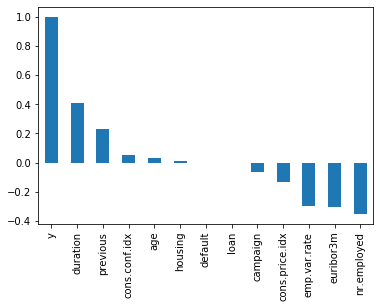

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
bank_data.corr()['y'].sort_values(ascending=False).plot(kind='bar')

In [52]:
bank_data.default.replace((1.0, 0.0),(1,0),inplace=True)
bank_data.housing.replace((1.0, 0.0),(1,0),inplace=True)
bank_data.loan.replace((1.0, 0.0),(1,0),inplace=True)

In [64]:
#Decoupling target
y=bank_data['y']
X=bank_data[bank_data.columns.difference(['y'])]
print(X.shape, y.shape)

(41188, 15) (41188,)


In [65]:
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [66]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y )

In [67]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(28831, 15) (28831,) (12357, 15) (12357,)


In [68]:
#Dummification
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
print(X_train.shape, X_test.shape)

(28831, 33) (12357, 33)


In [69]:
X_train.dtypes

age                                int64
campaign                           int64
cons.conf.idx                    float64
cons.price.idx                   float64
default                          float64
duration                           int64
emp.var.rate                     float64
euribor3m                        float64
housing                          float64
loan                             float64
nr.employed                      float64
previous                           int64
education_basic.4y                 uint8
education_basic.6y                 uint8
education_basic.9y                 uint8
education_high.school              uint8
education_illiterate               uint8
education_professional.course      uint8
education_university.degree        uint8
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired     

In [70]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(X_train)
X_train=pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame( imputer.transform(X_test), columns=X_test.columns)

In [71]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame( scaler.transform(X_test), columns=X_test.columns)

In [72]:
X_train.head()

,age,campaign,cons.conf.idx,cons.price.idx,default,duration,emp.var.rate,euribor3m,housing,loan,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,1.734711,0.526946,-0.475565,0.590823,0.0,-0.304595,0.837318,0.770405,0.908537,-0.423413,...,-0.277904,-0.206852,-0.186789,-0.325825,-0.14788,-0.441272,-0.159469,-0.353340,0.807593,-0.626095
1,-0.861587,-0.571272,0.891005,0.722682,0.0,-0.812087,0.645658,0.709751,-1.100670,-0.423413,...,-0.277904,-0.206852,-0.186789,-0.325825,-0.14788,-0.441272,-0.159469,2.830139,-1.238248,-0.626095
2,2.023188,-0.205199,-1.429994,-0.871770,0.0,-0.541171,-1.207054,-1.296465,0.908537,-0.423413,...,-0.277904,4.834366,-0.186789,-0.325825,-0.14788,-0.441272,-0.159469,2.830139,-1.238248,-0.626095
3,0.292323,-0.571272,-1.429994,-0.871770,0.0,0.698941,-1.207054,-1.284334,-1.100670,2.361761,...,3.598365,-0.206852,-0.186789,-0.325825,-0.14788,-0.441272,-0.159469,-0.353340,0.807593,-0.626095
4,1.830870,-0.571272,0.891005,0.722682,0.0,-0.026047,0.645658,0.709751,-1.100670,-0.423413,...,-0.277904,4.834366,-0.186789,-0.325825,-0.14788,-0.441272,-0.159469,-0.353340,-1.238248,-0.626095


In [73]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
nb=GaussianNB()
nb.fit(X_train,y_train)
nb_train_preds=nb.predict(X_train)
nb_test_preds=nb.predict(X_test)
print(confusion_matrix(y_train, nb_train_preds))
print(confusion_matrix(y_test, nb_test_preds))
print( classification_report(y_train, nb_train_preds))
print(classification_report(y_test, nb_test_preds))

[[22230  3353]
 [ 1277  1971]]
[[9520 1445]
 [ 523  869]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     25583
           1       0.37      0.61      0.46      3248

    accuracy                           0.84     28831
   macro avg       0.66      0.74      0.68     28831
weighted avg       0.88      0.84      0.86     28831

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     10965
           1       0.38      0.62      0.47      1392

    accuracy                           0.84     12357
   macro avg       0.66      0.75      0.69     12357
weighted avg       0.88      0.84      0.86     12357



In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, x
AdaBoostClassifier(base_estimator=)
GradientBoostingClassifier(bas)